In [2]:
# Initialize spark session with support for hive tables

from pyspark.sql import SparkSession
spark = (
    SparkSession.builder.
    master("local[2]").
    appName("App Store").
    config("hive.metastore.uris", "thrift://localhost:9083").
    enableHiveSupport().
    getOrCreate()
)

In [4]:
# Load hive tables as DataFrames

appsDF = spark.sql("select * from playstore.app")
reviewsDF = sqlContext.sql("select * from playstore.review")
print(type(appsDF))

<class 'pyspark.sql.dataframe.DataFrame'>


In [7]:
# Get count of free vs paid apps using functional programming style

appsByTypeDF = appsDF.groupBy("type").count().filter(appsDF.type.isin(['Free','Paid']))
appsByTypeDF.show()

+----+-----+
|type|count|
+----+-----+
|Free|10039|
|Paid|  800|
+----+-----+



In [10]:
# Get count of free vs paid apps using SQL

appsByTypeSqlDF = spark.sql("SELECT type, count(type) FROM playstore.app WHERE type IN ('Free', 'Paid') GROUP BY type")
appsByTypeSqlDF.show()

+----+-----------+
|type|count(type)|
+----+-----------+
|Free|      10039|
|Paid|        800|
+----+-----------+



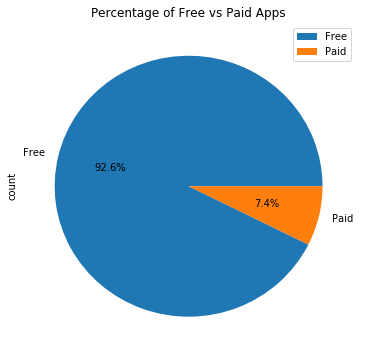

In [14]:
# Pie chart plot count of free vs paid apps

appsByTypePDF = appsByTypeDF.toPandas()
appsByTypePDF.plot(
    kind='pie',
    y='count',
    labels=appsByTypePDF['type'],
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Percentage of Free vs Paid Apps'
)

In [15]:
appsByCategoryDF = appsDF.groupBy("category").count().orderBy(['count'], ascending=[0]).limit(30)
appsByCategoryDF.show()

+-------------------+-----+
|           category|count|
+-------------------+-----+
|             FAMILY| 1972|
|               GAME| 1144|
|              TOOLS|  843|
|            MEDICAL|  463|
|           BUSINESS|  460|
|       PRODUCTIVITY|  424|
|    PERSONALIZATION|  392|
|      COMMUNICATION|  387|
|             SPORTS|  384|
|          LIFESTYLE|  382|
|            FINANCE|  366|
| HEALTH_AND_FITNESS|  341|
|        PHOTOGRAPHY|  335|
|             SOCIAL|  295|
| NEWS_AND_MAGAZINES|  283|
|           SHOPPING|  260|
|   TRAVEL_AND_LOCAL|  258|
|             DATING|  234|
|BOOKS_AND_REFERENCE|  231|
|      VIDEO_PLAYERS|  175|
+-------------------+-----+
only showing top 20 rows



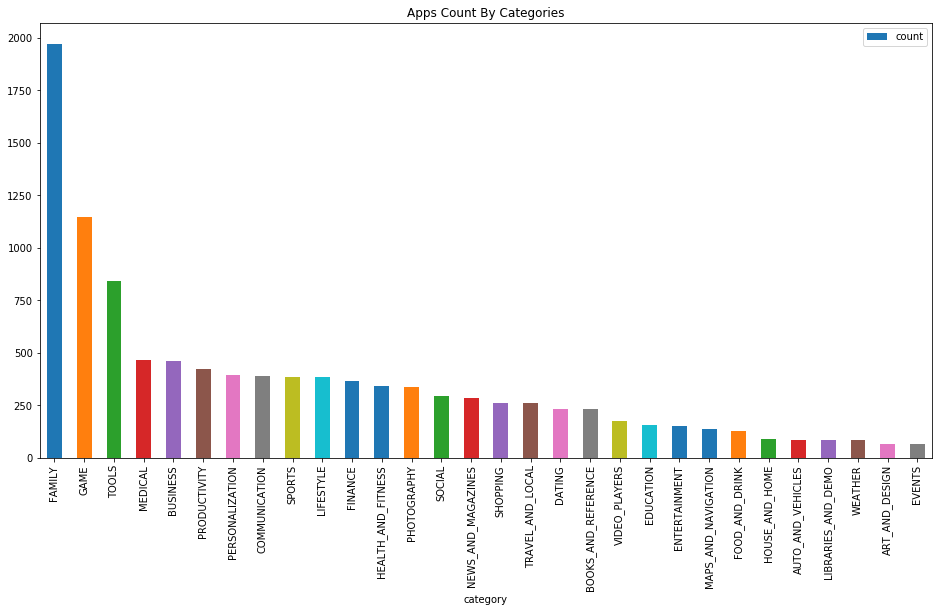

In [16]:
appsByCategoryPDF = appsByCategoryDF.toPandas()
appsByCategoryPDF.plot(
    kind='bar',
    y='count',
    x='category',
    title='Apps Count By Categories',
    figsize=(16,8)
)

In [10]:
ratingsPDF = ratingsDF.toPandas()
ratingsPDF

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.5333333333333333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.28846153846153844
3,10 Best Foods for You,nan,nan,nan,nan
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
5,10 Best Foods for You,Best idea us,Positive,1.0,0.3
6,10 Best Foods for You,Best way,Positive,1.0,0.3
7,10 Best Foods for You,Amazing,Positive,0.6000000000000001,0.9
8,10 Best Foods for You,nan,nan,nan,nan
9,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0


In [23]:
reviewsBySentiment = reviewsDF.groupBy("sentiment").count().filter(reviewsDF.sentiment.isin(['Positive','Neutral','Negative','nan']))
reviewsBySentiment.show()

+---------+-----+
|sentiment|count|
+---------+-----+
|      nan|26863|
| Positive|23998|
|  Neutral| 5163|
| Negative| 8271|
+---------+-----+



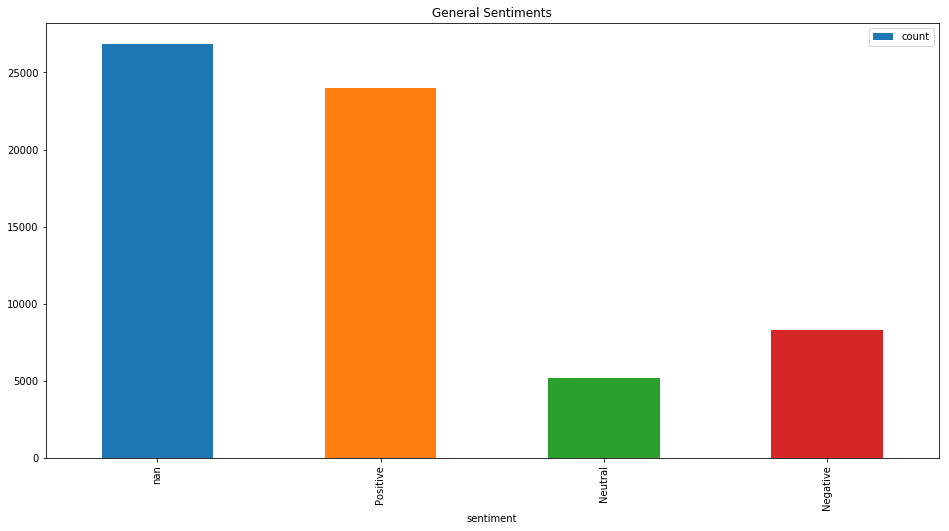

In [24]:
reviewsBySentiment.toPandas().plot(
    kind='bar',
    y='count',
    x='sentiment',
    title='General Sentiments',
    figsize=(16,8)
)